In [1]:
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import os

#Import sklearn classes 
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# sklearn utility to compare algorithms
from sklearn import model_selection

#Visualisation Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 

import warnings  
warnings.filterwarnings('ignore')

from eli5 import explain_weights,show_weights
from yellowbrick import ROCAUC
from yellowbrick.classifier import ClassificationReport

print("Imported all libraries successfully")
#print(os.listdir("../input"))

CV_N_REPEATS=20
BINS=10

Imported all libraries successfully


# Input Data

In [2]:
game = pd.read_csv(r"D:\Bootcamp data scientist\Final Project\Template Project\Template Project Data Science\Case Study 03\high_diamond_ranked_10min.csv")
game

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# Data Cleaning + Pengecekan Data Null

In [3]:
game.isnull()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9877,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Jika dilihat sekilas, secara keseluruhan, tidak ada data yang null

In [4]:
game=game.dropna(axis=1)
game

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Setelah itu dilakukan pengecekan apakah ada data yang null

In [5]:
total=game.isnull().sum().sort_values(ascending=False)
percent=(game.isnull().sum()/game.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
gameId,0,0.0
blueWins,0,0.0
redWardsDestroyed,0,0.0
redFirstBlood,0,0.0
redKills,0,0.0
redDeaths,0,0.0
redAssists,0,0.0
redEliteMonsters,0,0.0
redDragons,0,0.0
redHeralds,0,0.0


Jumlah baris tetap sama seperti sebelumnya, sehingga dapat dibuktikan bahwa tidak ada data yang null

In [6]:
game['gameId'].is_unique

True

Terbukti kalau nilai gameId unik dan tidak ada yang duplikat

# Pengecekan dan Penghapusan Outlier

In [7]:
# Function untuk mendeteksi dan menghapus baris yang mengandung outlier dengan metode IQR
def remove_outliers_iqr(game):
    outliers_indices = set()
    
    for col in game.columns:
        # Menghitung Q1, Q3, dan IQR
        Q1 = np.percentile(game[col], 25)
        Q3 = np.percentile(game[col], 75)
        IQR = Q3 - Q1
        
        # Rentang batas untuk menentukan outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mendapatkan indeks baris yang mengandung outlier
        outlier_indices = game[(game[col] < lower_bound) | (game[col] > upper_bound)].index
        outliers_indices.update(outlier_indices)
    
    # Menghapus baris yang mengandung outlier
    game_clean = game.drop(outliers_indices)
    
    return game_clean

# Menghapus baris yang mengandung outliers
game_clean = remove_outliers_iqr(game)
print("Dataset tanpa outlier:")
print(game_clean)

Dataset tanpa outlier:
          gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
2     4521474530         0               15                   0   
9     4509433346         1               13                   1   
10    4452162573         0               20                   3   
12    4515594785         1               18                   1   
...          ...       ...              ...                 ...   
9855  4527433973         0               15                   3   
9856  4527887542         1               19                   1   
9873  4527878058         1               18                   2   
9876  4527713716         0               23                   1   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
2             

# Pengecekan Tipe Data

In [8]:
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        3730 non-null   int64  
 1   blueWins                      3730 non-null   int64  
 2   blueWardsPlaced               3730 non-null   int64  
 3   blueWardsDestroyed            3730 non-null   int64  
 4   blueFirstBlood                3730 non-null   int64  
 5   blueKills                     3730 non-null   int64  
 6   blueDeaths                    3730 non-null   int64  
 7   blueAssists                   3730 non-null   int64  
 8   blueEliteMonsters             3730 non-null   int64  
 9   blueDragons                   3730 non-null   int64  
 10  blueHeralds                   3730 non-null   int64  
 11  blueTowersDestroyed           3730 non-null   int64  
 12  blueTotalGold                 3730 non-null   int64  
 13  blueAvgL

Mengubah tipe data gameId

In [9]:
game_clean['gameId'] = game_clean['gameId'].astype(str)
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        3730 non-null   object 
 1   blueWins                      3730 non-null   int64  
 2   blueWardsPlaced               3730 non-null   int64  
 3   blueWardsDestroyed            3730 non-null   int64  
 4   blueFirstBlood                3730 non-null   int64  
 5   blueKills                     3730 non-null   int64  
 6   blueDeaths                    3730 non-null   int64  
 7   blueAssists                   3730 non-null   int64  
 8   blueEliteMonsters             3730 non-null   int64  
 9   blueDragons                   3730 non-null   int64  
 10  blueHeralds                   3730 non-null   int64  
 11  blueTowersDestroyed           3730 non-null   int64  
 12  blueTotalGold                 3730 non-null   int64  
 13  blueAvgL

# Menambahkan variabel Kategori

In [10]:
game_clean['blue_category'] = game_clean['blueWins'].map({0: 'Kalah',1: 'Menang'})
game_clean['blue_category']

0        Kalah
2        Kalah
9       Menang
10       Kalah
12      Menang
         ...  
9855     Kalah
9856    Menang
9873    Menang
9876     Kalah
9878    Menang
Name: blue_category, Length: 3730, dtype: object

In [11]:
game_clean['blue_FirstBlood'] = game_clean['blueFirstBlood'].map({0: 'No',1: 'First'})
game_clean['blue_FirstBlood']

0       First
2          No
9       First
10      First
12      First
        ...  
9855       No
9856    First
9873    First
9876       No
9878    First
Name: blue_FirstBlood, Length: 3730, dtype: object

In [12]:
game_clean['red_FirstBlood'] = game_clean['redFirstBlood'].map({0: 'No',1: 'First'})
game_clean['red_FirstBlood']

0          No
2       First
9          No
10         No
12         No
        ...  
9855    First
9856       No
9873       No
9876    First
9878       No
Name: red_FirstBlood, Length: 3730, dtype: object

Melihat kolom yang bertambah

In [13]:
game_clean

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_category,blue_FirstBlood,red_FirstBlood
0,4519157822,0,28,2,1,9,6,11,0,0,...,17047,197,55,-643,8,19.7,1656.7,Kalah,First,No
2,4521474530,0,15,0,0,7,11,4,1,1,...,17254,203,28,1172,1033,20.3,1728.5,Kalah,No,First
9,4509433346,1,13,1,1,4,5,5,1,1,...,18379,247,43,1548,1574,24.7,1660.5,Menang,First,No
10,4452162573,0,20,3,1,4,4,6,0,0,...,18196,216,51,-331,1585,21.6,1514.3,Kalah,First,No
12,4515594785,1,18,1,1,7,1,11,1,1,...,17443,240,50,-3274,-1659,24.0,1459.1,Menang,First,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,4527433973,0,15,3,0,2,7,3,0,0,...,17538,198,42,880,-179,19.8,1614.8,Kalah,No,First
9856,4527887542,1,19,1,1,10,2,12,0,0,...,16043,179,45,-4693,-2968,17.9,1358.1,Menang,First,No
9873,4527878058,1,18,2,1,12,6,13,0,0,...,17027,197,38,-2639,-2364,19.7,1593.4,Menang,First,No
9876,4527713716,0,23,1,0,6,7,5,0,0,...,19909,261,60,2416,1877,26.1,1831.9,Kalah,No,First


# Exploratory Data Analysis

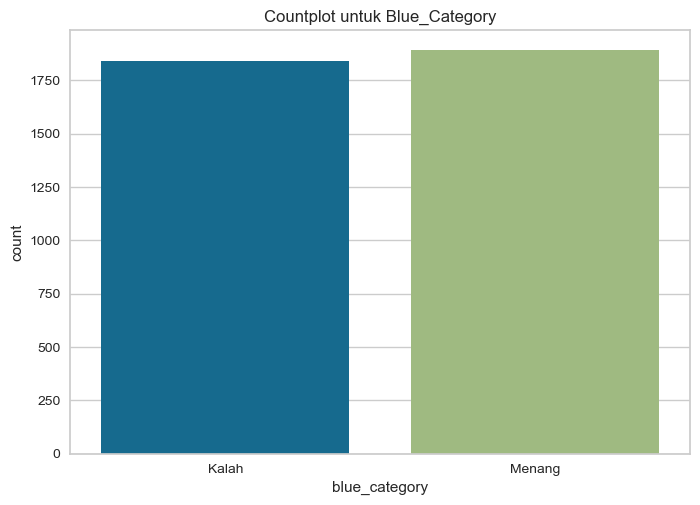

In [14]:
plt.figure()
ax = sns.countplot(data=game_clean, x='blue_category');
ax.set_title("Countplot untuk Blue_Category");

In [15]:
game_clean['blue_category'].value_counts()

blue_category
Menang    1891
Kalah     1839
Name: count, dtype: int64

# Mengelompokkan variabel kategori dan numerik

In [16]:
num_cols=game._get_numeric_data().columns
gn=game_clean[num_cols]
gn

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
10,4452162573,0,20,3,1,4,4,6,0,0,...,0,15143,7.2,18196,216,51,-331,1585,21.6,1514.3
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,4527433973,0,15,3,0,2,7,3,0,0,...,0,16148,6.6,17538,198,42,880,-179,19.8,1614.8
9856,4527887542,1,19,1,1,10,2,12,0,0,...,0,13581,6.4,16043,179,45,-4693,-2968,17.9,1358.1
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9


In [17]:
gc=game_clean.drop(num_cols, axis=1)
gc

,blue_category,blue_FirstBlood,red_FirstBlood
0,Kalah,First,No
2,Kalah,No,First
9,Menang,First,No
10,Kalah,First,No
12,Menang,First,No
...,...,...,...
9855,Kalah,No,First
9856,Menang,First,No
9873,Menang,First,No
9876,Kalah,No,First


In [18]:
#gn_drop=['blueWins','blueFirstBlood','redFirstBlood']
gn.drop(columns=['blueWins', 'blueFirstBlood', 'redFirstBlood'], inplace=True)

In [19]:
gn.shape

(3730, 37)

Boxplot looping buat semua variabel

In [20]:
# for i in gn.columns:
#     plt.figure()
#     plt.tight_layout()
#     sns.set(rc={"figure.figsize":(8, 5)})
#     f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
#     plt.gca().set(xlabel= i,ylabel='Frequency')
#     sns.boxplot(gn[i], ax=ax_box , linewidth= 1.0)

# Persiapan Data (Data Preparation)

Variabel yang digunakan untuk menyimpan dataset yang berisikan fitur untuk analisis selanjutnya dinamakan dengan greg

In [21]:
greg=gn[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists','blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]
greg

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,9,6,11,0,0,0,0,17210,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
2,15,0,7,11,4,1,1,0,0,16113,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
9,13,1,4,5,5,1,1,0,0,15057,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
10,20,3,4,4,6,0,0,0,0,15474,...,0,15143,7.2,18196,216,51,-331,1585,21.6,1514.3
12,18,1,7,1,11,1,1,0,0,17865,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,15,3,2,7,3,0,0,0,0,15268,...,0,16148,6.6,17538,198,42,880,-179,19.8,1614.8
9856,19,1,10,2,12,0,0,0,0,18274,...,0,13581,6.4,16043,179,45,-4693,-2968,17.9,1358.1
9873,18,2,12,6,13,0,0,0,0,18573,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9876,23,1,6,7,5,0,0,0,0,15903,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9


# Data Preprocessing

# Scalling pada data numerik

Dataset greg yang sudah discalling disimpan dalam variabel greg_scalling

In [22]:
greg_p=preprocessing.MinMaxScaler(feature_range=(0,1))
greg_p.fit(greg)
greg_s=greg_p.transform(greg)

greg_scalling=pd.DataFrame(greg_s, columns=['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'])
greg_scalling

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.954545,0.250,0.642857,0.428571,0.6875,0.0,0.0,0.0,0.0,0.581333,...,0.0,0.509173,0.428571,0.355265,0.325000,0.588235,0.451219,0.507734,0.325000,0.509173
1,0.363636,0.000,0.500000,0.785714,0.2500,1.0,1.0,0.0,0.0,0.440493,...,0.0,0.601938,0.428571,0.389486,0.375000,0.058824,0.596245,0.613425,0.375000,0.601938
2,0.272727,0.125,0.285714,0.357143,0.3125,1.0,1.0,0.0,0.0,0.304917,...,0.0,0.514083,0.428571,0.575467,0.741667,0.352941,0.626288,0.669210,0.741667,0.514083
3,0.590909,0.375,0.285714,0.285714,0.3750,0.0,0.0,0.0,0.0,0.358454,...,0.0,0.325194,0.714286,0.545214,0.483333,0.509804,0.476149,0.670344,0.483333,0.325194
4,0.500000,0.125,0.500000,0.071429,0.6875,1.0,1.0,0.0,0.0,0.665426,...,0.0,0.253876,0.428571,0.420731,0.683333,0.490196,0.240991,0.335842,0.683333,0.253876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,0.363636,0.375,0.142857,0.500000,0.1875,0.0,0.0,0.0,0.0,0.332007,...,0.0,0.455039,0.285714,0.436436,0.333333,0.333333,0.572913,0.488451,0.333333,0.455039
3726,0.545455,0.125,0.714286,0.142857,0.7500,0.0,0.0,0.0,0.0,0.717936,...,0.0,0.123385,0.142857,0.189287,0.175000,0.392157,0.127607,0.200866,0.175000,0.123385
3727,0.500000,0.250,0.857143,0.428571,0.8125,0.0,0.0,0.0,0.0,0.756323,...,0.0,0.427390,0.285714,0.351959,0.325000,0.254902,0.291730,0.263147,0.325000,0.427390
3728,0.727273,0.125,0.428571,0.500000,0.3125,0.0,0.0,0.0,0.0,0.413532,...,0.0,0.735530,0.857143,0.828401,0.858333,0.686275,0.695645,0.700454,0.858333,0.735530


# 1. Classification (Supervised Learning)

Data yang digunakan adalah greg_scalling dan kategorinya terdapat pada kolom 'blueWins' pada dataset game_clean <br>
Menggunakan 2 kurung siku agar bisa membuat dataframe <br>
Kategorik harus berupa 0 dan 1, dilabeli di akhir

# Step 1: Data Train dan Data Test

In [23]:
X = greg_scalling
Y = game_clean['blueWins']
test_size = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (3357, 36)
Shape of X_test: (373, 36)


# Step 2: Pemodelan Klasifikasi

## Dummy Classifier

Strategi "most frequent" adalah salah satu strategi yang digunakan oleh DummyClassifier di scikit-learn. Dalam strategi ini, model memprediksi kelas yang paling sering muncul (kelas mayoritas) dari data pelatihan, tanpa memperhatikan fitur-fitur lainnya. Hal ini kurang bagus untuk yang data yang timpang

Strategi yang digunakan adalah Uniform. Strategi ini membuat prediksi secara acak dengan probabilitas yang sama untuk setiap kelas. Ini sangat berguna jika Anda ingin baseline yang benar-benar acak untuk menguji performa model kompleks.

In [45]:
dum=DummyClassifier(strategy='uniform')
dum=dum.fit(X_train,y_train)

#compute accuracy
score=dum.score(X_test, y_test)
print("Dummy Classifier Accuracy: %.2f%%" % (score * 100.0))

Dummy Classifier Accuracy: 49.33%


<Figure size 700x700 with 0 Axes>

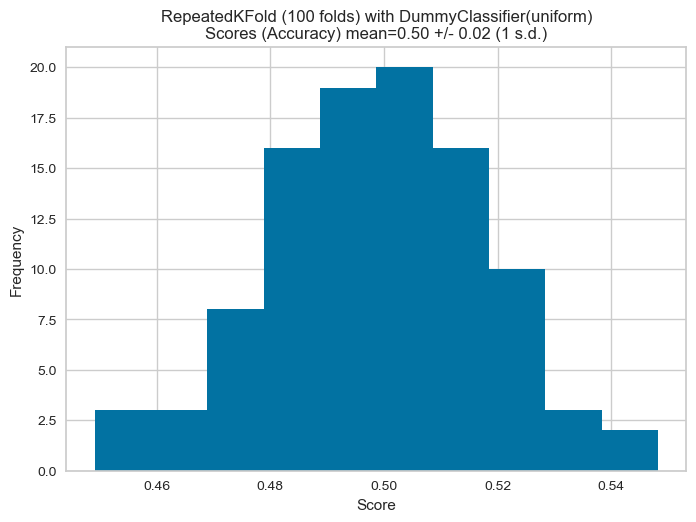

In [46]:
strategy = "uniform"

scores = cross_val_score(dum,X, Y, 
                         cv=RepeatedKFold(n_repeats=CV_N_REPEATS), 
                         scoring=None) 
scores_dummy = scores.copy()

score_line = "Scores (Accuracy) mean={0:.2f} +/- {1:.2f} (1 s.d.)".format(scores.mean(),scores.std())
plt.figure(figsize=(7,7))
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with DummyClassifier({strategy})\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

Berdasarkan output, Rata-rata skor nya adalah 0.5. Standar deviasinya adalah 0.2. 

Berdasarkan histogram, distribusi cenderung tersebar ke berbagai nilai dan juga terlihat simetris. Puncak dari histogram ini berada di sekitar 0.5 yang merupakan akurasi rata ratanya.

Berdasarkan output sebelumnya, nilai akurasi pada data uji = 0.4933 mendekati akurasi dari validasi silang (rata-rata akurasi) = 0.5. Jika akurasi dari validasi silang mirip dengan akurasi pada data uji, itu bisa menunjukkan bahwa model memiliki performa yang konsisten dan dapat menggeneralisasi dengan baik pada data yang berbeda.

## K-Nearest Neighbors

Pada model ini saya akan mempertimbangkan 11 tetangga terdekat untuk menentukan kelas dari sebuah titik data.
scores.mean() memberi rata-rata akurasi dari semua pengulangan validasi silang.
scores.std() memberi standar deviasi dari skor akurasi, menunjukkan seberapa bervariasi hasil antara berbagai pengujian.

Desimal output adalah 2 angka di belakang koma

In [26]:
knn=KNeighborsClassifier(n_neighbors=11) 
knn.fit(X_train,y_train)

#compute accuracy
scores = cross_val_score(knn, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

Accuracy mean=0.69 +/- 0.01 (1 s.d.)


Berdasarkan output di atas, dapat disimpulkan bahwa: <br>
1. Secara keseluruhan, akurasi rata-rata bernilai 69% menunjukkan bahwa model KNN bekerja dengan baik, namun masih memiliki ruang untuk perbaikan. 
2. Standar deviasi yang bernilai 0.02 atau bernilai sangat rendah berarti hasilnya sangat konsisten. Hal ini berarti Model KNN sangat stabil dan dapat diandalkan.

## Decision Tree

Parameter yang digunakan dalam metode ini: 

1. random_state=1: Menetapkan nilai seed untuk memastikan hasil yang konsisten ketika menjalankan ulang kode. Menjaga konsistensi dalam percobaan, karena beberapa aspek Decision Tree melibatkan elemen acak.
2. max_depth=2: Menetapkan kedalaman maksimum pohon keputusan (Decision Tree). Ini berarti pohon dapat memiliki maksimal dua level percabangan. Ini adalah metode untuk mengontrol kompleksitas model dan mencegah overfitting.

In [27]:
dt=DecisionTreeClassifier(random_state=1, max_depth=2)
dt=dt.fit(X_train,y_train)
dt_scores = cross_val_score(dt, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={dt_scores.mean():0.2f} +/- {dt_scores.std():0.2f} (1 s.d.)")

Accuracy mean=0.71 +/- 0.02 (1 s.d.)


Berdasarkan output di atas, dapat disimpulkan bahwa: <br>

1. Secara keseluruhan, akurasi rata-rata bernilai 71% artinya akurasi cukup baik yang menunjukkan bahwa model Decision Tree memiliki tingkat pemahaman yang memadai tentang data. 
2. Standar deviasi yang bernilai 0.01 atau bernilai sangat rendah berarti hasilnya sangat konsisten. Hal ini berarti Model Decision Tree sangat stabil dan dapat diandalkan.

## Bagging

In [28]:
# bagging tidak bisa dilakukan karena waktu proses sangat lama
# bag=BaggingClassifier(n_estimators=100,oob_score=True) 
# bag=bag.fit(X_train,y_train)

# bag_scores = cross_val_score(bag, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
# print("Accuracy mean={0:0.2f} +/- {1:0.2f} (1 s.d.)".format(scores.mean(),scores.std()))
# print("Out of bag score: {0:0.2f}".format(bag.oob_score_*100) );

## Random Forest

Parameter yang digunakan:
1. num_estimators = 100: Menentukan jumlah estimators atau pohon dalam Random Forest. Dalam kasus ini, akan ada 100 pohon dalam model Random Forest.
2. akurasi model dalam persentase dengan format dua angka desimal {0:0.2f}

In [29]:
num_estimators=100
rf = RandomForestClassifier(n_estimators=num_estimators) 
rf.fit(X_train, y_train)

rf_score=rf.score(X_test, y_test)
print("Accuracy of Random Forest Classifier: {0:0.2f}".format(rf_score * 100.0));

#Make Predictions
y_pred = rf.predict(X_test)
#Plot the confusion matrix
confusion_matrix(y_pred, y_test)

Accuracy of Random Forest Classifier: 71.58


array([[140,  51],
       [ 55, 127]], dtype=int64)

Selanjutnya adalah pembobotan

Keterangan tabel:
1. Kolom "Weight" menunjukkan nilai bobot atau pentingnya suatu fitur. Semakin besar nilai bobot (nilai yang di sebelah kiri ±), semakin signifikan fitur tersebut dalam mempengaruhi keputusan model.
2. Nilai yang diberikan memiliki "±" atau nilai di sebelah kanan, yang menunjukkan variasi atau standar deviasi dari bobot dalam berbagai pohon di Random Forest. Nilai ini menunjukkan tingkat ketidakpastian dalam estimasi bobot. Variasi yang tinggi menunjukkan bahwa fitur tersebut mungkin memiliki pengaruh yang berbeda-beda tergantung pada pohon mana yang dianalisis.

In [30]:
feature_names=X_train.columns.values
show_weights(rf,feature_names=feature_names)

Weight,Feature
0.0931 ± 0.1485,blueGoldDiff
0.0855 ± 0.1405,redGoldDiff
0.0624 ± 0.1025,redExperienceDiff
0.0573 ± 0.0834,blueExperienceDiff
0.0499 ± 0.0827,redGoldPerMin
0.0479 ± 0.0698,redTotalGold
0.0467 ± 0.0628,blueTotalGold
0.0439 ± 0.0511,blueTotalExperience
0.0438 ± 0.0584,blueGoldPerMin
0.0394 ± 0.0282,redTotalExperience


Dalam output yang diberikan, "blueGoldDiff" memiliki bobot tertinggi dengan nilai rata-rata 0.0931, menunjukkan bahwa ini adalah fitur yang paling penting dalam model.

"blueGoldDiff" juga memiliki tingkat variasi yang tertinggi. Variasi dalam bobot (standar deviasi) memberikan gambaran tentang konsistensi pengaruh fitur. Standar deviasi yang lebih rendah menunjukkan konsistensi yang lebih tinggi dalam pengaruh fitur. Fitur dengan standar deviasi yang rendah sesuai yang terlihat di output adalah fitur 'redAssist'

Scores mean=0.70 +/- 0.02 (1 s.d.)


<Figure size 800x550 with 0 Axes>

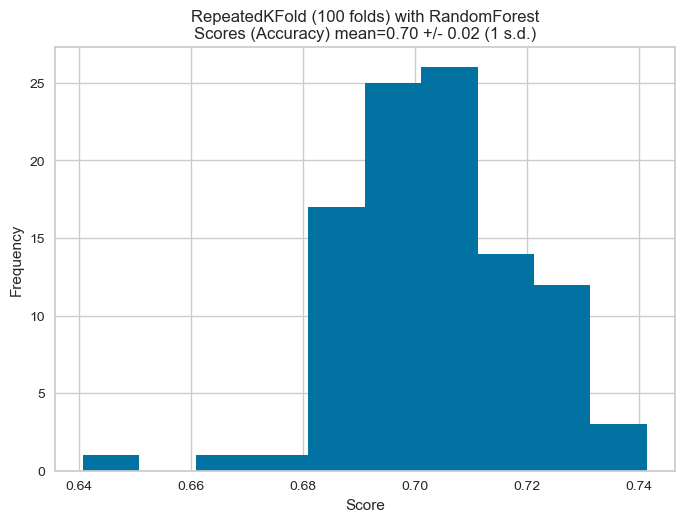

In [31]:
scores = cross_val_score(rf, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
scores_est = scores.copy()
print(f"Scores mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)")

score_line = f"Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
plt.figure()
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with RandomForest\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

Berdasarkan output, Rata-rata skor nya adalah 0.7. Rata-rata skor memberikan indikasi akurasi rata-rata model. Standar deviasinya adalah 0.2. Standar deviasi menunjukkan seberapa besar variasi atau ketidakpastian dalam hasil akurasi. Semakin rendah standar deviasi, semakin konsisten hasil akurasi antara berbagai fold.

NB:
Accuracy of Random Forest Classifier adalah evaluasi kinerja model berdasarkan satu set data uji tertentu. Sedangkan rata rata akurasi adalah akurasi yang dihitung dari seluruh fold dalam validasi silang. Hal ini karena dataset yang telah dibagi menjadi beberapa bagian (fold). Jumlah fold di sini adalah 100.

Berdasarkan histogram, distribusi cenderung tersebar ke berbagai nilai, namun condong ke arah kanan. Puncak dari histogram ini berada di sekitar 0.7 yang merupakan akurasi rata ratanya. 

Berdasarkan output sebelumnya, nilai akurasi pada data uji = 0.7158 mendekati akurasi dari validasi silang (rata-rata akurasi) = 0.7. Jika akurasi dari validasi silang mirip dengan akurasi pada data uji, itu bisa menunjukkan bahwa model memiliki performa yang konsisten dan dapat menggeneralisasi dengan baik pada data yang berbeda.


## Dummy Classifier vs Random Forest

<Figure size 800x550 with 0 Axes>

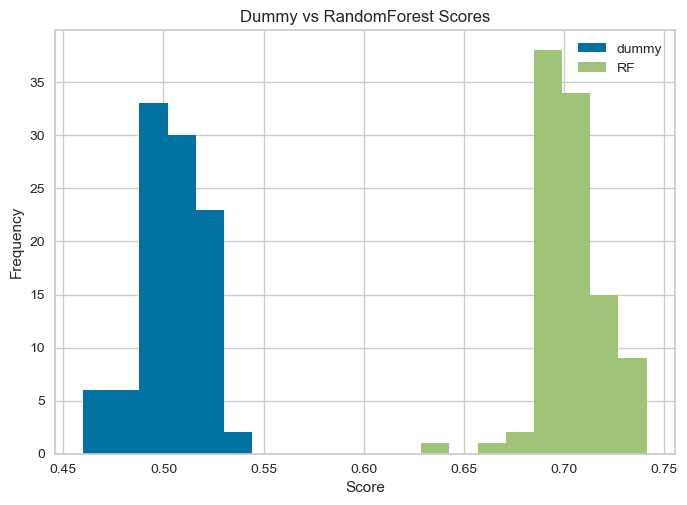

In [32]:
plt.figure()
fig, ax = plt.subplots()
df_dummy_est_scores = pd.DataFrame({'dummy': scores_dummy, 'RF': scores_est})
df_dummy_est_scores.plot(kind='hist', ax=ax, bins=20)
ax.set_xlabel("Score")
ax.set_title("Dummy vs RandomForest Scores");

Pada output terlihat bahwa Random Forest menunjukkan skor yang lebih tinggi daripada model Dummy, hal ini menandakan bahwa Random Forest lebih akurat.

## Gradient Boosting

In [33]:
from sklearn.metrics import mean_squared_error
params={'n_estimators': 500,'learning_rate': 0.01,'max_depth': 4, 'loss':'deviance'}
gbm=GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, loss='deviance', max_depth=4,
                           n_estimators=500)

Text(0, 0.5, 'Deviance')

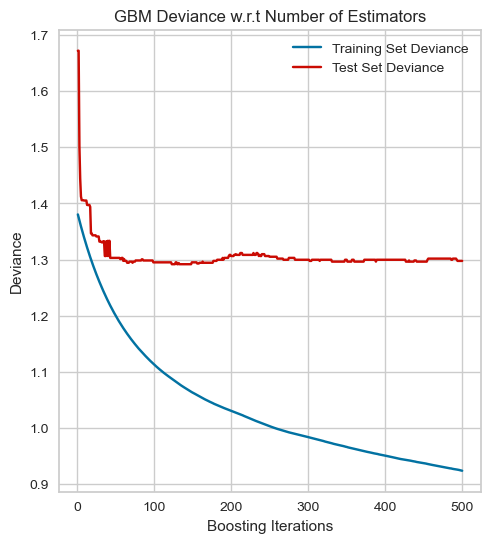

In [47]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm.staged_predict(X_test)):
    test_score[i] = gbm.loss_(y_test, y_pred)

#plot train and test set deviance against the number of estimators
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('GBM Deviance w.r.t Number of Estimators')
plt.plot(np.arange(params['n_estimators']) + 1, gbm.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='best')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

Pada output di atas, dapat dilihat bahwa pada data train, semakin bertambah iterasinya, maka semakin turun standar deviasinya. Sedangkan pada data test, nilai standar deviasinya cenderung berhenti dan konstan di sekitar iterasi ke 50, kemudian tidak turun sampai iterasinya berakhir. Hal ini menandakan bahwa hasil iterasinya konvergen di sekitaran 50.

Karena pemahaman setiap orang pada grafik berbeda, maka perlu evaluasi secara formal untuk hasil yang lebih pasti

In [54]:
gbm_scores = cross_val_score(gbm, X, Y, cv=RepeatedStratifiedKFold(n_repeats=CV_N_REPEATS))
print(f"Accuracy mean={gbm_scores.mean():0.2f} +/- {gbm_scores.std():0.2f} (1 s.d.)")

Accuracy mean=0.71 +/- 0.02 (1 s.d.)


Berdasarkan output di atas, dapat disimpulkan bahwa:

1. Secara keseluruhan, akurasi rata-rata bernilai 71% artinya akurasi cukup baik yang menunjukkan bahwa model Gradient Boosting memiliki tingkat pemahaman yang memadai tentang data.
2. Standar deviasi yang bernilai 0.02 atau bernilai sangat rendah berarti hasilnya sangat konsisten. Hal ini berarti Model Gradient Boosting sangat stabil dan dapat diandalkan.

## XGBoost

Nilai kategori harus berupa 0 dan 1

In [35]:
X = greg_scalling
Y = game_clean['blueWins']
test_size = 0.10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (3357, 36)
Shape of X_test: (373, 36)


In [36]:
from xgboost import XGBClassifier, plot_importance,to_graphviz

# fit model on training data
param = {'max_depth': 3, 'eta': 0.8, 'subsample':1, 'objective': 'binary:logistic'}
xgb = XGBClassifier(**param)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# make predictions for test data
y_pred = xgb.predict(X_test)

# evaluate predictions
xgb_score = accuracy_score(y_test, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(xgb_score * 100.0));

#Plot the confusion matrix
confusion_matrix(y_pred, y_test)

Accuracy of XGB Classifier: 69.17


array([[130,  50],
       [ 65, 128]], dtype=int64)

<Figure size 800x550 with 0 Axes>

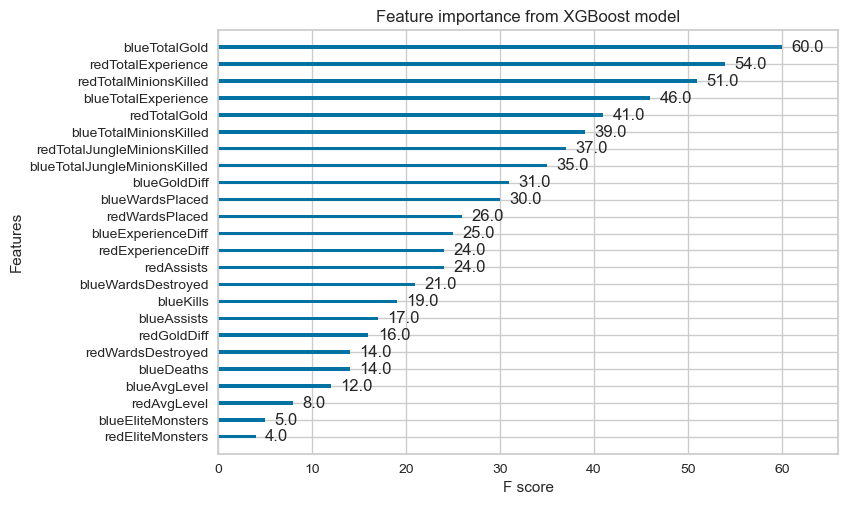

In [38]:
# plot feature importance using built-in function
plt.figure()
plot_importance(xgb,title="Feature importance from XGBoost model")
plt.show()

Dalam output yang diberikan, "blueTotalGold" memiliki bobot tertinggi dengan nilai skor 60, menunjukkan bahwa ini adalah fitur yang paling penting dalam model.

# Stacking

In [53]:
from mlxtend.classifier import StackingCVClassifier

sclf = StackingCVClassifier(classifiers=[knn, rf, xgb, gbm, dt], 
                          meta_classifier=rf)

print('10-fold cross validation:\n')

for clf, label in zip([knn, rf, xgb, gbm, dt, rf], 
                      ['KNearest Neighbors',
                       'Random Forest', 
                        'XGB','GBM','Decision Tree',
                       'MetaClassifier']):

    sclf_scores = model_selection.cross_val_score(clf, X, Y,
                                              cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (sclf_scores.mean(), sclf_scores.std(), label))

10-fold cross validation:

Accuracy: 0.69 (+/- 0.02) [KNearest Neighbors]
Accuracy: 0.71 (+/- 0.03) [Random Forest]
Accuracy: 0.68 (+/- 0.02) [XGB]
Accuracy: 0.71 (+/- 0.02) [GBM]
Accuracy: 0.71 (+/- 0.02) [Decision Tree]
Accuracy: 0.70 (+/- 0.03) [MetaClassifier]


Hasil output menunjukkan akurasi rata-rata dan deviasi standar untuk masing-masing model. Akurasi berkisar antara 0.68 hingga 0.71, dengan deviasi standar antara 0.02 dan 0.03. Secara umum, nilai deviasi standar yang rendah menunjukkan konsistensi dalam kinerja model di seluruh fold.

Random Forest (RF), Gradient Boosting Machine (GBM), dan Decision Tree memiliki akurasi yang sama (0.71), menunjukkan bahwa model ini bekerja dengan baik dalam skenario ini. Namun, akurasi bukan satu-satunya metrik yang dapat digunakan untuk mengevaluasi model.

MetaClassifier yang menggunakan Random Forest sebagai meta-classifier mencapai akurasi 0.70 dengan deviasi standar 0.03, menunjukkan bahwa metode stacking dapat menghasilkan hasil yang sebanding dengan model individual lainnya.

# Summarize results

Pada syntax ini, nilai yang digunakan adalah: 

kfold=10, pembagian validasi silang dengan 10 bagian (folds). Dengan StratifiedKFold, pembagian mempertahankan proporsi kelas yang sama pada setiap fold.
Metrik evaluasi yang digunakan adalah recall. Recall adalah metrik yang mengukur seberapa baik model mendeteksi true positives (jumlah prediksi yang benar untuk kelas tertentu dibandingkan dengan jumlah sebenarnya dari kelas tersebut)


In [40]:
models = []
#models.append(('LR', LogisticRegression()))
models.append(('KNN', knn))
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('GBM', gbm))
models.append(('XGB', xgb))

In [41]:
results = []
names = []

for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)
    
#Add stacking results that we got previously
results.append(np.asarray(sclf_scores))
names.append('Stacking')

KNN: 0.6789974937343358 (0.039799907142075076)
DT: 0.6741993873572821 (0.06983953907305668)
RF: 0.6874380395433027 (0.03596986086351322)
GBM: 0.7048872180451128 (0.043526881177757784)
XGB: 0.6705458089668616 (0.0329462168649369)


Kesimpulan:

1. Model GBM memiliki recall rata-rata tertinggi di antara model-model yang diuji, yang menunjukkan kemampuannya mendeteksi true positives dengan lebih baik.
2. Model RF juga memiliki skor recall yang tinggi. Selain itu standar deviasi dari model ini adalah yang paling rendah, sehingga menunjukkan konsistensi hasil. Standar deviasi memberikan indikasi tentang variasi hasil. Nilai yang lebih tinggi menunjukkan hasil yang lebih bervariasi antar fold.

# Visualisasi hasil

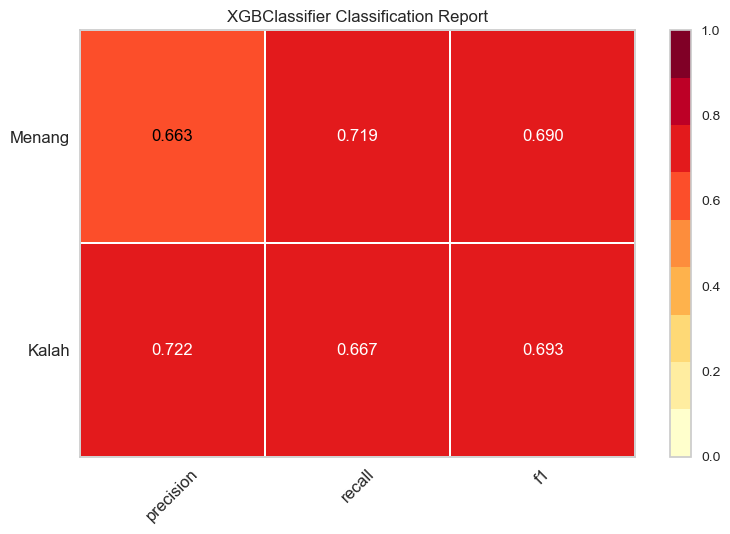

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [42]:
visualizer = ClassificationReport(xgb,classes=['Kalah','Menang'])

#visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.poof()                  # Draw/show/poof the data

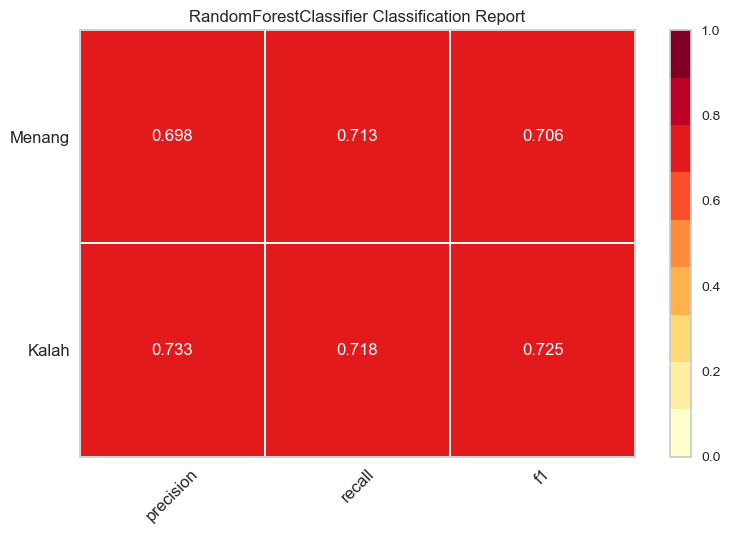

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [43]:
visualizer = ClassificationReport(rf,classes=['Kalah','Menang'])

#visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.poof()                  # Draw/show/poof the data

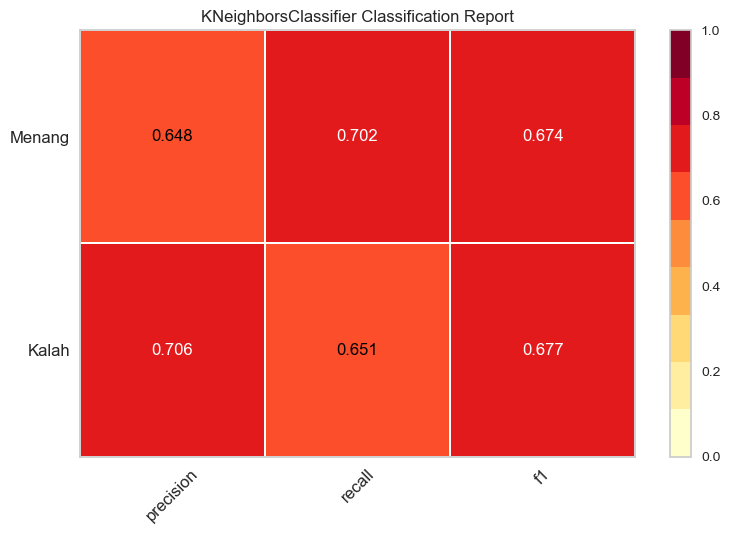

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [49]:
visualizer = ClassificationReport(knn,classes=['Kalah','Menang'])
#visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.poof()                  # Draw/show/poof the data

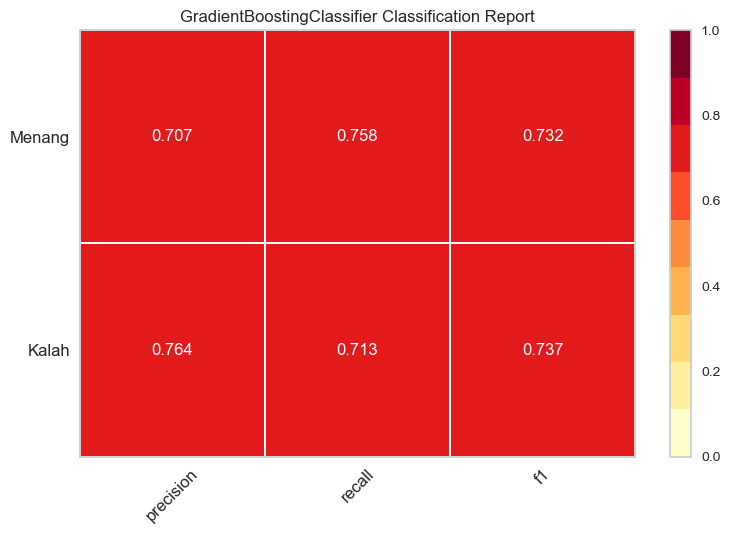

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [50]:
visualizer = ClassificationReport(gbm,classes=['Kalah','Menang'])

#visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.poof()                  # Draw/show/poof the data

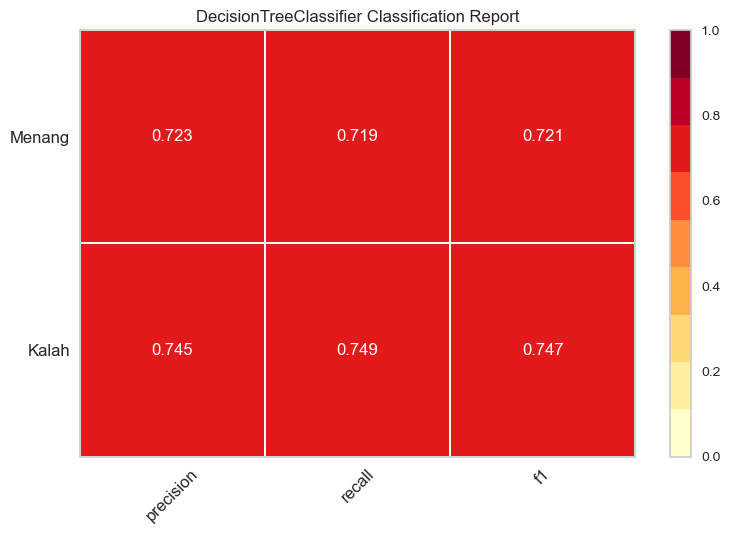

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [51]:
visualizer = ClassificationReport(dt,classes=['Kalah','Menang'])

#visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.poof()                  # Draw/show/poof the data